## ANALYSIS DATA EXPLORATORY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

train = pd.read_csv('train.csv', header=None, encoding = "ISO-8859-1")
test = pd.read_csv('test.csv', header=None )

#train = pd.read_csv('train.csv', header=None)

In [4]:
test.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [5]:
train.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# Renombrar las columnas
nuevos_nombres = [ 'TARGET', 'CODIGO', 'FECHA_STRING', 'TIPO', 'USUARIO', 'COMENTARIO']

In [7]:
#test.rename(columns=nuevos_nombres, inplace=True)
test.rename(columns=dict(zip(test.columns, nuevos_nombres)), inplace=True)
train.rename(columns=dict(zip(train.columns, nuevos_nombres)), inplace=True)

In [8]:
test.head()

,TARGET,CODIGO,FECHA_STRING,TIPO,USUARIO,COMENTARIO
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [9]:
train.head()

,TARGET,CODIGO,FECHA_STRING,TIPO,USUARIO,COMENTARIO
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   TARGET        1600000 non-null  int64 
 1   CODIGO        1600000 non-null  int64 
 2   FECHA_STRING  1600000 non-null  object
 3   TIPO          1600000 non-null  object
 4   USUARIO       1600000 non-null  object
 5   COMENTARIO    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
train.shape

(1600000, 6)

In [12]:
test.shape

(498, 6)

In [13]:
train.nunique()

TARGET                2
CODIGO          1598315
FECHA_STRING     774363
TIPO                  1
USUARIO          659775
COMENTARIO      1581466
dtype: int64

In [14]:
#SACAR LOS DUPLICADOS Y ENCONTRAR SI SON IGUALES LOS RESULTADOS.
#SI ES ASI LO SACAMOS.
#TERMINAR CON UNA CONCLUSIÓN

#### ¿Existen casos duplicados?

In [15]:
duplicados = train[train.duplicated()]

In [16]:
duplicados.head()

,TARGET,CODIGO,FECHA_STRING,TIPO,USUARIO,COMENTARIO


In [17]:
train_sin_duplicados = train.drop_duplicates()

In [18]:
train_sin_duplicados.nunique()

TARGET                2
CODIGO          1598315
FECHA_STRING     774363
TIPO                  1
USUARIO          659775
COMENTARIO      1581466
dtype: int64

In [19]:
train_sin_duplicados.head()

,TARGET,CODIGO,FECHA_STRING,TIPO,USUARIO,COMENTARIO
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [20]:
duplicados2 = train[train[['TARGET','COMENTARIO']].duplicated()]

In [21]:
duplicados2.shape

(16309, 6)

In [22]:
train.shape

(1600000, 6)

In [23]:
duplicados2.to_csv('duplicados.csv', index=False)

In [24]:
duplicados2.groupby('TARGET').count()

,CODIGO,FECHA_STRING,TIPO,USUARIO,COMENTARIO
TARGET,,,,,
0,9815,9815,9815,9815,9815
4,6494,6494,6494,6494,6494


In [25]:
train_sin_duplicados2 = train[['TARGET','COMENTARIO']].drop_duplicates()

In [26]:
train_sin_duplicados2.shape

(1583691, 2)

In [27]:
train_sin_duplicados2.head()

,TARGET,COMENTARIO
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [28]:
train['TARGET'].unique()

array([0, 4], dtype=int64)

In [29]:
train['TIPO'].unique()

array(['NO_QUERY'], dtype=object)

In [30]:
#prueba del modelo con 0,2 y 0,2,4

In [31]:
train_sin_duplicados2.groupby('TARGET').count()

,COMENTARIO
TARGET,
0,790185
4,793506


#### ¿La Data está Balanceada?

In [32]:
train.TARGET.value_counts()

TARGET
0    800000
4    800000
Name: count, dtype: int64

In [33]:
#ventaja: esto reduce los problemas a futuro.

In [34]:
train_f = train_sin_duplicados[['TARGET','FECHA_STRING','COMENTARIO']]

C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\usuario\AppData\Local\Temp\ipykernel_14204\3838241470.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_f.TARGET, palette='Spectral')
C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribución de clases')

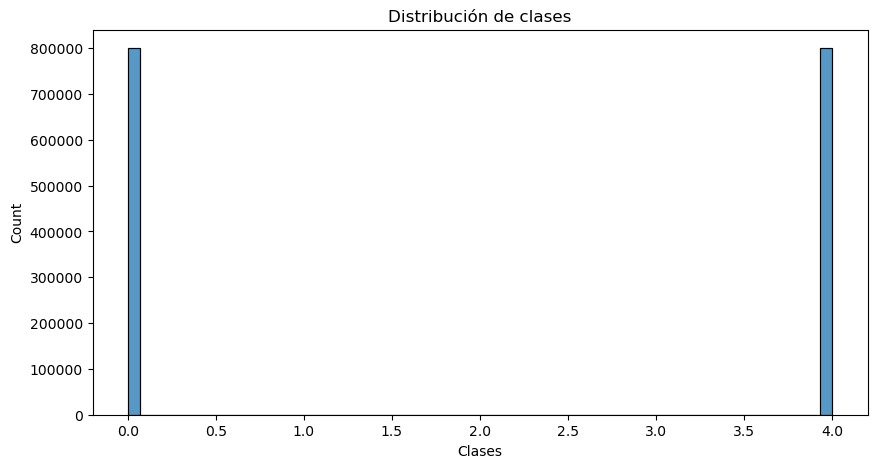

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_f.TARGET, palette='Spectral')
plt.xlabel('Clases')
plt.title('Distribución de clases')

El Dataset de train está completamente balanceado, esto genera ventajas ya que nuestros datos estan completos y es muy bueno para hacer el training

### Analisis univariable

#### Distribución en el tiempo

In [37]:
train_1k = train_f.sample(n=300000, random_state=42).copy()

In [38]:
train_1k.head()

,TARGET,FECHA_STRING,COMENTARIO
541200,0,Tue Jun 16 18:18:12 PDT 2009,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,upper airways problem


In [39]:
#train_1k["FECHA_HORA"] = pd.to_datetime(train_1k["FECHA_STRING"])
# Crea columnas separadas para fecha y hora
#train_1k['FECHA'] = train_1k['FECHA_HORA'].dt.date
#train_1k['HORA'] = train_1k['FECHA_HORA'].dt.time  

In [40]:
def to_datetime(df, cols= [] ):
    for col in cols:   
        df[col] = pd.to_datetime(df[col])
        df[f'FECHA'] = df[col].dt.date
        df[f'HORA'] = df[col].dt.time 
    return df

In [41]:
#Aplicar la función
train_1k = to_datetime(train_1k, cols=['FECHA_STRING'])

C:\Users\usuario\AppData\Local\Temp\ipykernel_14204\2542664120.py:3: FutureWarning: Parsed string "Tue Jun 16 18:18:12 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df[col] = pd.to_datetime(df[col])


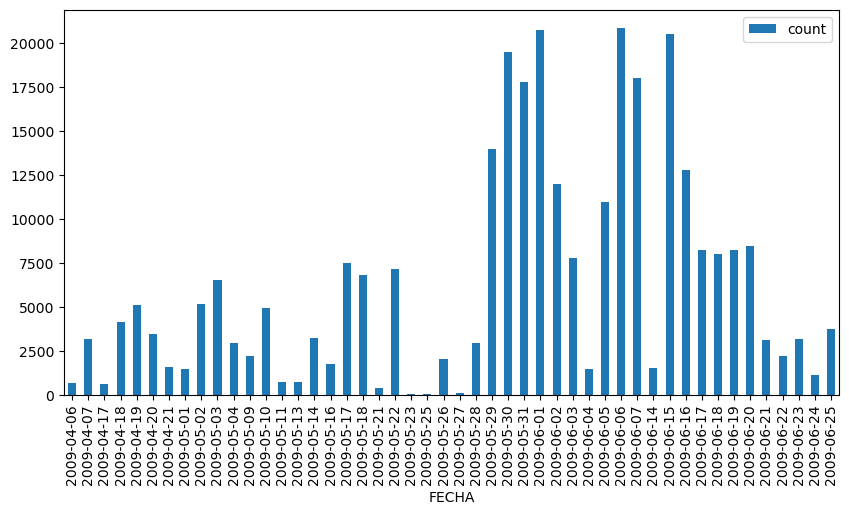

In [42]:
train_1k_agrupado = train_1k.groupby('FECHA').size().to_frame("count").reset_index()
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
train_1k_agrupado.plot(kind='bar', x='FECHA',y='count', ax = axes)
plt.show()

#### Número de token antes de la limpieza

In [53]:
#from nltk.tokenize import TweetTokenizer

In [40]:
pd.__file__

'C:\\Users\\Alberto Navarro\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\pandas\\__init__.py'

In [42]:
#pip show pandas

Name: pandas
Version: 2.1.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 

In [44]:
from transformers import pipeline

C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [46]:
#pip uninstall nltk
#pip install -U nltk
import nltk

C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


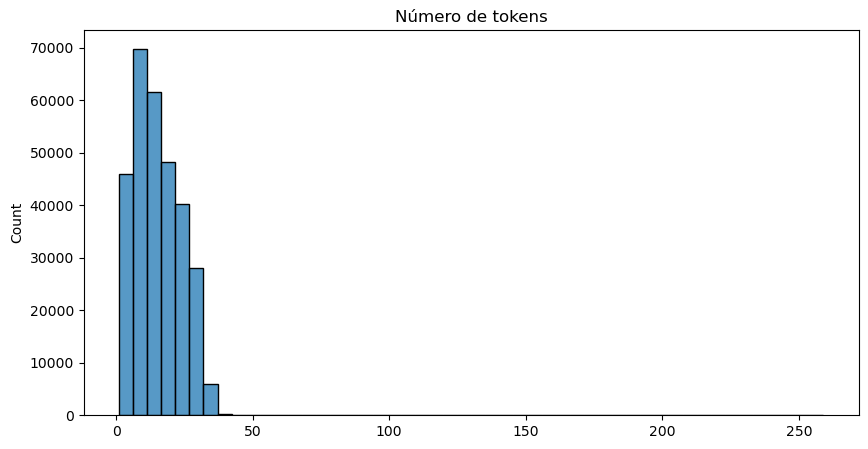

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TweetTokenizer
#Grafico de histograma de numero de tokens por sentencia.
train_ac = train_1k.copy()

tknz = TweetTokenizer(preserve_case=False)
size_texts_list = [len(tknz.tokenize(text)) for text in train_ac.COMENTARIO]
plt.figure(figsize=(10,5))
sns.histplot(size_texts_list, bins=50)
plt.title('Número de tokens')
plt.show()

In [48]:
train_ac.head()

,TARGET,FECHA_STRING,COMENTARIO,FECHA,HORA
541200,0,2009-06-16 18:18:12,@chrishasboobs AHHH I HOPE YOUR OK!!!,2009-06-16,18:18:12
750,0,2009-04-06 23:11:14,"@misstoriblack cool , i have no tweet apps fo...",2009-04-06,23:11:14
766711,0,2009-06-23 13:40:11,@TiannaChaos i know just family drama. its la...,2009-06-23,13:40:11
285055,0,2009-06-01 10:26:07,School email won't open and I have geography ...,2009-06-01,10:26:07
705995,0,2009-06-20 12:56:51,upper airways problem,2009-06-20,12:56:51


#### Crear Dataset para la limpieza de datos y luego compararlo con el original

In [49]:
train_dc = train_1k.copy()

In [50]:
train_dc.head()

,TARGET,FECHA_STRING,COMENTARIO,FECHA,HORA
541200,0,2009-06-16 18:18:12,@chrishasboobs AHHH I HOPE YOUR OK!!!,2009-06-16,18:18:12
750,0,2009-04-06 23:11:14,"@misstoriblack cool , i have no tweet apps fo...",2009-04-06,23:11:14
766711,0,2009-06-23 13:40:11,@TiannaChaos i know just family drama. its la...,2009-06-23,13:40:11
285055,0,2009-06-01 10:26:07,School email won't open and I have geography ...,2009-06-01,10:26:07
705995,0,2009-06-20 12:56:51,upper airways problem,2009-06-20,12:56:51


#### Limpieza de datos

In [61]:
#def remove_urls(text):
    # Expresión regular para identificar URLs
 #   url_pattern = re.compile(r'https?://\S+|www\.\S+')
  #  return url_pattern.sub(r'', text)

In [62]:
# Aplicar la función a la columna 'tweet'
#import re

#train_dc['COMENTARIO_SIN_URL'] = train_dc['COMENTARIO'].apply(remove_urls)

In [51]:
def clean_tweets(text, remove_punctuacion=True,   remove_retweets=True, remove_mentions=True,
                remove_hashtags=False, remove_urls=True, remove_at=True, remove_pad=True, remove_numbers=False):
    if remove_punctuacion:
        text = re.compile('\r').sub(' ', text)
        text = re.compile('\n').sub(' ', text)
        text = re.compile('"').sub('', text)
        text = re.compile(r'[^\w\s!]+').sub('', text)#Remover signo de interrogación
        text = re.compile('&quot;').sub('', text)
        text = re.compile('[+-]').sub('', text)
        text = re.compile(r'<[\w_]+').sub('', text)
        text = re.compile(r'>').sub(' ', text)
        
        punctuation = '¡!$%&*+<=>[\\]^_`{|}~•'
        text = re.sub(f'[{punctuation}]+', ' ', text)
        dots = '\.{2,}'
        text = re.sub(f'({dots})+', '.', text)
        text = re.sub('\s+', ' ', text)#remover doble espacio
        
        
        #text = remove_emoji(text) if remove_emojis else text #Remove emojis
        text = re.compile(r'RT @[A-Za-z0-9_-]+:').sub('', text) if remove_retweets else text #Remove retweets
        text = re.compile(r'@[A-Za-z0-9_-]+').sub('', text) if remove_mentions else text #Remove mentions
        text = re.compile(r'#[A-Za-z0-9_-]+').sub('', text) if remove_hashtags else text #Remove hashtags 
        text = re.compile(
    r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))") \
    .sub('', text) if remove_urls else text #Remove URL
        
        text = re.compile(r'(?:@)').sub('', text) if remove_at else text #Remove @
        text = re.compile(r'(?:#)').sub('', text) if remove_pad else text #Remove #
        text = re.sub('([0-9]+)', '', text) if remove_numbers else text #Remove numbers
        
        return text

In [52]:
import re
train_dc["COMENTARIO_LIMPIO"]=train_dc["COMENTARIO"].apply(clean_tweets)

In [53]:
train_dc.head()

,TARGET,FECHA_STRING,COMENTARIO,FECHA,HORA,COMENTARIO_LIMPIO
541200,0,2009-06-16 18:18:12,@chrishasboobs AHHH I HOPE YOUR OK!!!,2009-06-16,18:18:12,chrishasboobs AHHH I HOPE YOUR OK
750,0,2009-04-06 23:11:14,"@misstoriblack cool , i have no tweet apps fo...",2009-04-06,23:11:14,misstoriblack cool i have no tweet apps for my...
766711,0,2009-06-23 13:40:11,@TiannaChaos i know just family drama. its la...,2009-06-23,13:40:11,TiannaChaos i know just family drama its lameh...
285055,0,2009-06-01 10:26:07,School email won't open and I have geography ...,2009-06-01,10:26:07,School email wont open and I have geography st...
705995,0,2009-06-20 12:56:51,upper airways problem,2009-06-20,12:56:51,upper airways problem


#### Tokenizacion

In [54]:
from nltk.tokenize import word_tokenize
#texto.split(' ')
#texto = test['COMENTARIO'].str.split(' ')
train_dc['PALABRAS'] = train_dc['COMENTARIO_LIMPIO'].str.split(' ')

In [55]:
#def filter_tokens(tokens_list):
    #return [token for token in tokens_list if "@" not in token]
 #   return [token.replace('@', '') for token in tokens_list]

# Aplicar la función a la columna 'TOKENS'
#train_1k_dc['PALABRAS'] = train_1k_dc['PALABRAS'].apply(filter_tokens)

# Imprimir el DataFrame resultante con los tokens filtrados
#print(train_1k_dc)
#ELIMINAR SOLO EL ARROBA, MAS NO LA PALABRA O INCLUSO DEJARLO

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [58]:
import pandas as pd
from nltk.tokenize import word_tokenize
 
# Tokenizar el texto en cada fila
train_dc['TOKENS'] = train_dc['COMENTARIO_LIMPIO'].apply(word_tokenize)

# Calcular el número de tokens en cada fila
train_dc['NUM_TOKENS'] = train_dc['TOKENS'].apply(len)

# Imprimir el DataFrame resultante con la columna 'NUM_TOKENS'
train_dc.head()

,TARGET,FECHA_STRING,COMENTARIO,FECHA,HORA,COMENTARIO_LIMPIO,PALABRAS,TOKENS,NUM_TOKENS
541200,0,2009-06-16 18:18:12,@chrishasboobs AHHH I HOPE YOUR OK!!!,2009-06-16,18:18:12,chrishasboobs AHHH I HOPE YOUR OK,"[chrishasboobs, AHHH, I, HOPE, YOUR, OK, ]","[chrishasboobs, AHHH, I, HOPE, YOUR, OK]",6
750,0,2009-04-06 23:11:14,"@misstoriblack cool , i have no tweet apps fo...",2009-04-06,23:11:14,misstoriblack cool i have no tweet apps for my...,"[misstoriblack, cool, i, have, no, tweet, apps...","[misstoriblack, cool, i, have, no, tweet, apps...",11
766711,0,2009-06-23 13:40:11,@TiannaChaos i know just family drama. its la...,2009-06-23,13:40:11,TiannaChaos i know just family drama its lameh...,"[TiannaChaos, i, know, just, family, drama, it...","[TiannaChaos, i, know, just, family, drama, it...",27
285055,0,2009-06-01 10:26:07,School email won't open and I have geography ...,2009-06-01,10:26:07,School email wont open and I have geography st...,"[School, email, wont, open, and, I, have, geog...","[School, email, wont, open, and, I, have, geog...",15
705995,0,2009-06-20 12:56:51,upper airways problem,2009-06-20,12:56:51,upper airways problem,"[upper, airways, problem, ]","[upper, airways, problem]",3


#### Número de token después de la limpieza

C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


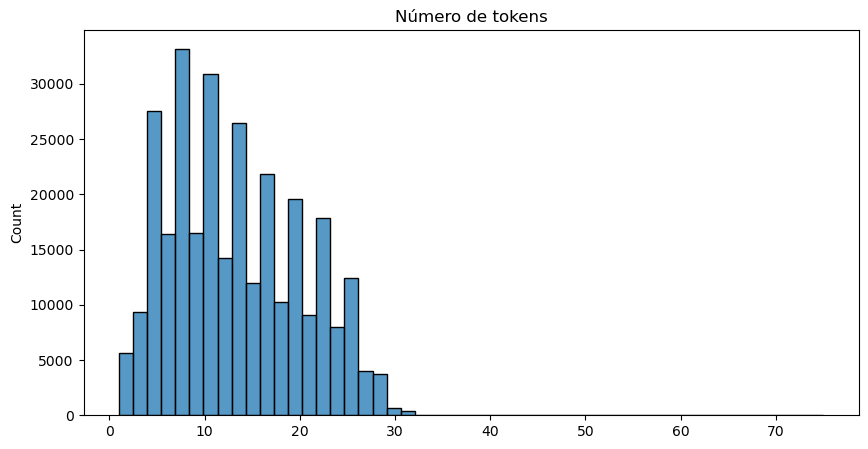

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TweetTokenizer
#Grafico de histograma de numero de tokens por sentencia.

tknz = TweetTokenizer(preserve_case=False)
size_texts_list = [len(tknz.tokenize(text)) for text in train_dc.COMENTARIO_LIMPIO]
plt.figure(figsize=(10,5))
sns.histplot(size_texts_list, bins=50)
plt.title('Número de tokens')
plt.show()

In [60]:
train_dc.head()

,TARGET,FECHA_STRING,COMENTARIO,FECHA,HORA,COMENTARIO_LIMPIO,PALABRAS,TOKENS,NUM_TOKENS
541200,0,2009-06-16 18:18:12,@chrishasboobs AHHH I HOPE YOUR OK!!!,2009-06-16,18:18:12,chrishasboobs AHHH I HOPE YOUR OK,"[chrishasboobs, AHHH, I, HOPE, YOUR, OK, ]","[chrishasboobs, AHHH, I, HOPE, YOUR, OK]",6
750,0,2009-04-06 23:11:14,"@misstoriblack cool , i have no tweet apps fo...",2009-04-06,23:11:14,misstoriblack cool i have no tweet apps for my...,"[misstoriblack, cool, i, have, no, tweet, apps...","[misstoriblack, cool, i, have, no, tweet, apps...",11
766711,0,2009-06-23 13:40:11,@TiannaChaos i know just family drama. its la...,2009-06-23,13:40:11,TiannaChaos i know just family drama its lameh...,"[TiannaChaos, i, know, just, family, drama, it...","[TiannaChaos, i, know, just, family, drama, it...",27
285055,0,2009-06-01 10:26:07,School email won't open and I have geography ...,2009-06-01,10:26:07,School email wont open and I have geography st...,"[School, email, wont, open, and, I, have, geog...","[School, email, wont, open, and, I, have, geog...",15
705995,0,2009-06-20 12:56:51,upper airways problem,2009-06-20,12:56:51,upper airways problem,"[upper, airways, problem, ]","[upper, airways, problem]",3


#### Detección de outliers

0.00     1.0
0.25     7.0
0.75    18.0
1.00    41.0
Name: NUM_TOKENS, dtype: float64

C:\Users\usuario\anaconda3\envs\antonio\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


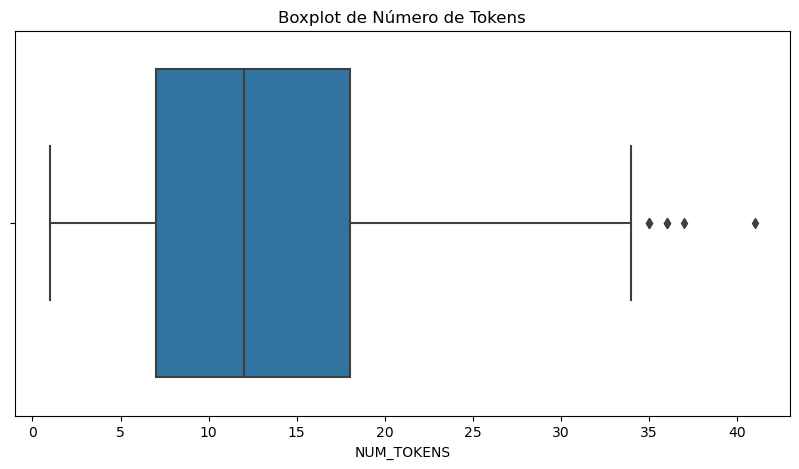

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quantile_train_1k = train_dc["NUM_TOKENS"].quantile([0, .25, .75, 1])
quantile_train_1k

Q1 = quantile_train_1k[0.25]
Q3 = quantile_train_1k[0.75]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

# Identificar outliers
outliers = train_dc[(train_dc['NUM_TOKENS'] < lower_bound) | (train_dc['NUM_TOKENS'] > upper_bound)]

# Graficar el resultado
plt.figure(figsize=(10, 5))
sns.boxplot(x="NUM_TOKENS", data=train_dc)#(train_dc['NUM_TOKENS'])
plt.title('Boxplot de Número de Tokens')
plt.show()

In [64]:
outliers

,TARGET,FECHA_STRING,COMENTARIO,FECHA,HORA,COMENTARIO_LIMPIO,PALABRAS,TOKENS,NUM_TOKENS
640367,0,2009-06-19 00:07:50,I stop this and i wish u can talk to me ..And ...,2009-06-19,00:07:50,I stop this and i wish u can talk to me And we...,"[I, stop, this, and, i, wish, u, can, talk, to...","[I, stop, this, and, i, wish, u, can, talk, to...",35
675528,0,2009-06-19 20:07:56,Tá»i hum wa mÃ¬nh ko tÃ i nÃ o ngá»§ ÄÆ°á»£c...,2009-06-19,20:07:56,Tái hum wa mÃnh ko tÃ i nÃ o ngá ÄÆác vÃbá ngÃ...,"[Tái, hum, wa, mÃnh, ko, tÃ, i, nÃ, o, ngá, ÄÆ...","[Tái, hum, wa, mÃnh, ko, tÃ, i, nÃ, o, ngá, ÄÆ...",36
981534,4,2009-05-18 01:43:09,@ajayrochester DO IT DO IT DO IT DO IT DO IT D...,2009-05-18,01:43:09,ajayrochester DO IT DO IT DO IT DO IT DO IT DO...,"[ajayrochester, DO, IT, DO, IT, DO, IT, DO, IT...","[ajayrochester, DO, IT, DO, IT, DO, IT, DO, IT...",41
582335,0,2009-06-17 16:56:20,So AT&amp;T cnt kp up wit all the tweets I rcv...,2009-06-17,16:56:20,So ATampT cnt kp up wit all the tweets I rcv v...,"[So, ATampT, cnt, kp, up, wit, all, the, tweet...","[So, ATampT, cnt, kp, up, wit, all, the, tweet...",37
852964,4,2009-04-20 23:40:29,@ddlovato don't care bout ppl who r saying u r...,2009-04-20,23:40:29,ddlovato dont care bout ppl who r saying u r t...,"[ddlovato, dont, care, bout, ppl, who, r, sayi...","[ddlovato, dont, care, bout, ppl, who, r, sayi...",36
432443,0,2009-06-07 07:04:45,k so im um now im goin back to sleep... i feel...,2009-06-07,07:04:45,k so im um now im goin back to sleep i feel ti...,"[k, so, im, um, now, im, goin, back, to, sleep...","[k, so, im, um, now, im, goin, back, to, sleep...",35


Los tweets con mas de "max_tipic_train_1k" son detectados porq es considerado outlier

In [65]:
train_dc_2 = train_dc.sample(n=30000, random_state=42).copy()#300

In [67]:
# Definir un diccionario de mapeo
sentiment_mapping = {4: 'positive', 2: 'neutral', 0: 'negative'}
train_dc_2['sentimiento'] = train_dc_2['TARGET'].map(sentiment_mapping)
sentiment_mapping = {'positive': 1, 'negative':0} 
# Asignar al campo TARGET
train_dc_2['TARGET'] = train_dc_2['sentimiento'].map(sentiment_mapping)

In [68]:
train_dc_2['comentario_tarea'] = "sentiment: " + train_dc_2['COMENTARIO_LIMPIO']

In [69]:
train_dc_2['TARGET'].unique()

array([1, 0], dtype=int64)

In [70]:
train_dc_2.to_csv('data_small_train.csv')